## B: Softmax regression:

In [186]:
from scipy import sparse
import matplotlib.pyplot as plt
import numpy as np

def convert_labels(y, C=3):
    """
    convert 1d label to a matrix label: each column of this
    matrix coresponding to 1 element in y. In i-th column of Y,
    only one non-zeros element located in the y[i]-th position,
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

    [[1, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0, keepdims=True)
    return A

def softmax_regression(X, y, num_classes, W_init, eta, tol = 1e-4, max_iter = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, num_classes)
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20
    while count < max_iter:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax_stable(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count % check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W

def cost(X, Y, W):
    A = softmax_stable(W.T.dot(X))
    return -np.sum(Y*np.log(A))

def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]

    we don't need to calculate probability by using softmax, just take argmax of the Z
    """
    Z = W.T.dot(X)
    return np.argmax(Z, axis = 0)

#Visualize
def display(X, label, show=False):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8)
    plt.plot()
    if show:
        plt.show()

#### VD B.1:

Data:

In [64]:
import numpy as np
import matplotlib.pyplot as plt
# randomly generate data
N = 500 # number of training sample
d = 2 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset
cov = [[1, 0], [0, 1]]
# generate 3 classes of datasets
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis = 0).T
# extended data by add row ONES (equivalent to 1) at first place
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

Traning model:

In [65]:
eta = 0.05
d = X.shape[0]
W_init = np.random.randn(d, C)
W = softmax_regression(X, original_label, C, W_init, eta)
print(W[-1])

[[ 8.22863328 -3.91367201 -3.96339607]
 [-0.26575952  2.3861102  -0.11471262]
 [-1.62705993 -1.53103458  1.60178776]]


Predict and visualize:

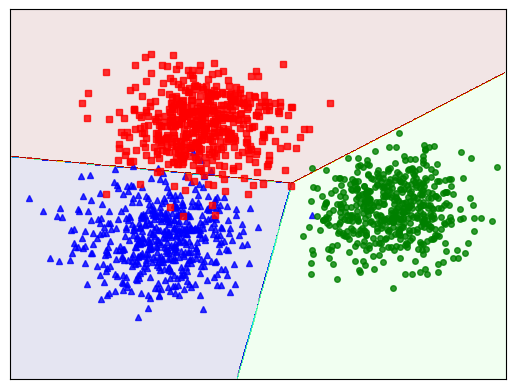

In [36]:
xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
Z = pred(W[-1], XX)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = 0.1)
plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())
display(X[1:, :], original_label)
plt.savefig('ex1.png', bbox_inches='tight', dpi = 300)
plt.show()

#### VD B.2:

Iris dataset:

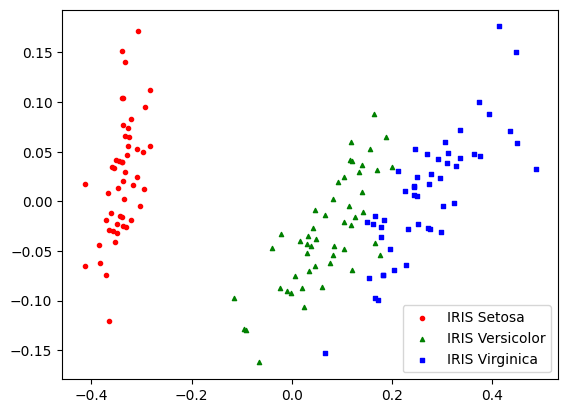

In [66]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()

X = iris.data[:, :4] # we take full 4 features
Y = iris.target
# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa', c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica', c='blue', marker="s")
plt.legend()
plt.show()

a. Using numpy:

In [67]:
from sklearn.model_selection import train_test_split

transformed['Y'] = Y
train_set, val_set = train_test_split(transformed, test_size=0.2, random_state=42, stratify=Y)
X_train, y_train = train_set.iloc[:, :-1].to_numpy(), train_set.iloc[:, -1].to_numpy()
X_val, y_val = val_set.iloc[:, :-1].to_numpy(), val_set.iloc[:, -1].to_numpy()
X_train = np.concatenate((np.ones((1, X_train.shape[0])), X_train.T), axis=0)
X_val = np.concatenate((np.ones((1, X_val.shape[0])), X_val.T), axis=0)

In [68]:
eta = 0.05
num_classes = 3
W_init = np.random.randn(X_train.shape[0], num_classes)
W = softmax_regression(X_train, y_train, num_classes, W_init, eta, max_iter=10000)
print(W[-1])

[[ -0.2610352    1.30779654  -0.31387863]
 [-12.33773434  -0.44111804   9.8679418 ]
 [  0.71435563  -3.25378802  -1.0781539 ]]


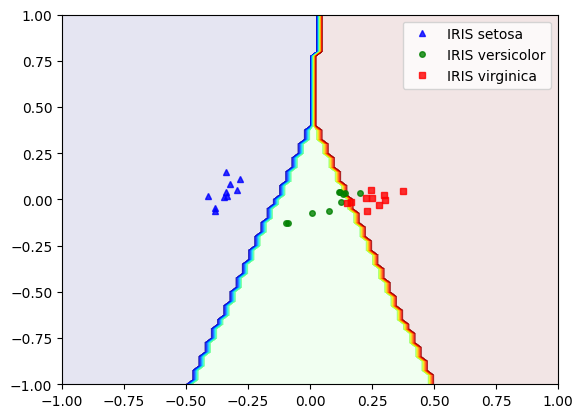

In [42]:
import numpy as np
import matplotlib.pyplot as plt

xm = np.arange(-0.5, 0.5, 0.025)
ym = np.arange(-0.2, 0.2, 0.025)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
Z = pred(W[-1], XX)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = 0.1)
X0 = X_val[1:, y_val == 0]
X1 = X_val[1:, y_val == 1]
X2 = X_val[1:, y_val == 2]
plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8, label='IRIS setosa')
plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8, label='IRIS versicolor')
plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8, label='IRIS virginica')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.plot()
plt.legend()
plt.savefig('ex2a.png', bbox_inches='tight', dpi = 300)
plt.show()

<Figure size 1000x600 with 0 Axes>

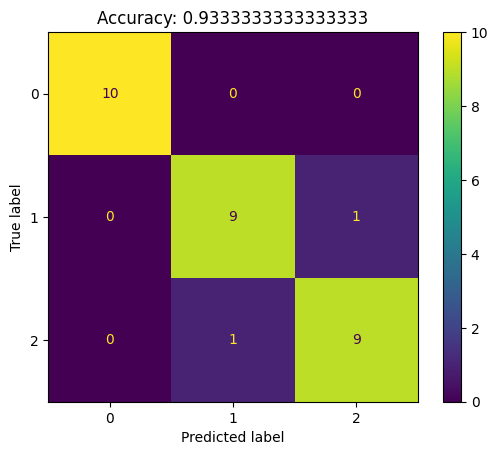

In [43]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

y_pred = pred(W[-1], X_val)
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.title(f'Accuracy: {accuracy_score(y_val, y_pred)}')
plt.show()

b. Using scikit-learn:

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data 
Y = iris.target 

# Splitting Train and test Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2, stratify=Y)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
# Call to Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient
lorg = LogisticRegression(solver='sag', max_iter=5000)
lorg.fit(X_train,Y_train)

# predict
Y_pred = lorg.predict(X_test)

<Figure size 1000x600 with 0 Axes>

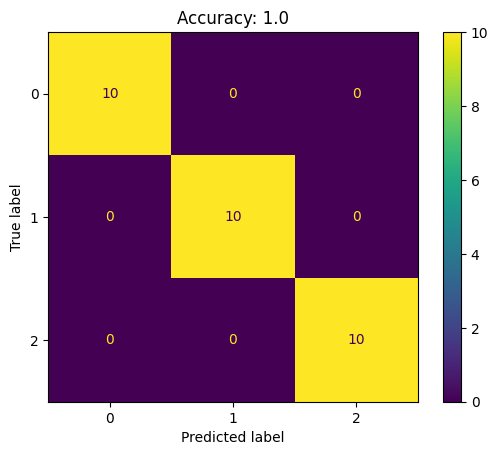

In [45]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
plt.title(f'Accuracy: {accuracy_score(Y_test, Y_pred)}')
plt.show()

#### VD B.3:

In [46]:
from sklearn.datasets import fetch_20newsgroups_vectorized
import ssl

ssl._create_default_https_context = ssl._create_stdlib_context

n_samples = 20000
X, y = fetch_20newsgroups_vectorized(subset='all', return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.1)

train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

In [47]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

<Figure size 1000x600 with 0 Axes>

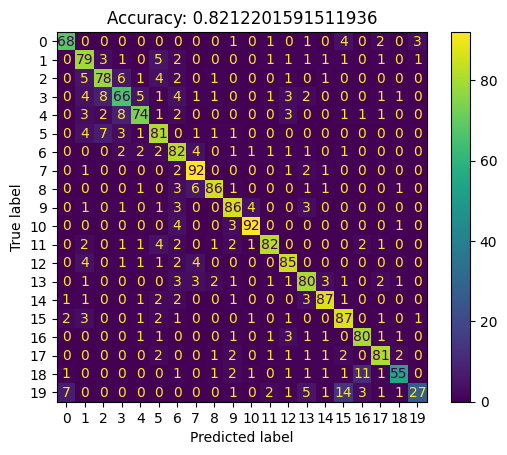

In [48]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = log_reg.predict(X_test)
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title(f'Accuracy: {accuracy_score(y_test, y_pred)}')
plt.show()

#### VD B4:

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split 

file_data = 'glass.csv' 
 
glass_df = pd.read_csv(file_data) 
print(glass_df.info())
 
glass_types = glass_df['Type'].unique() 
print(glass_df['Type'].value_counts()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id_Number  214 non-null    int64  
 1   RI         214 non-null    float64
 2   Na         214 non-null    float64
 3   Mg         214 non-null    float64
 4   Al         214 non-null    float64
 5   Si         214 non-null    float64
 6   K          214 non-null    float64
 7   Ca         214 non-null    float64
 8   Ba         214 non-null    float64
 9   Fe         214 non-null    float64
 10  Type       214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB
None
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [151]:
from sklearn.preprocessing import StandardScaler

X_1 = glass_df.iloc[:, 1:-1].to_numpy()
y_1 = glass_df['Type'].to_numpy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_1)

# create Xbar
Xbar = np.concatenate((np.ones((X_scaled.shape[0], 1)), X_scaled), axis=1)

# convert y to [0, 6] instead of [1, 7]
y = y_1 - 1

# train test split
X_train, X_test, y_train, y_test = train_test_split(Xbar, y, test_size=0.2, random_state=42, stratify=y)

Using scikit-learn:

In [152]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(fit_intercept=False, max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, max_iter=10000)

Evaluate:

<Figure size 1000x600 with 0 Axes>

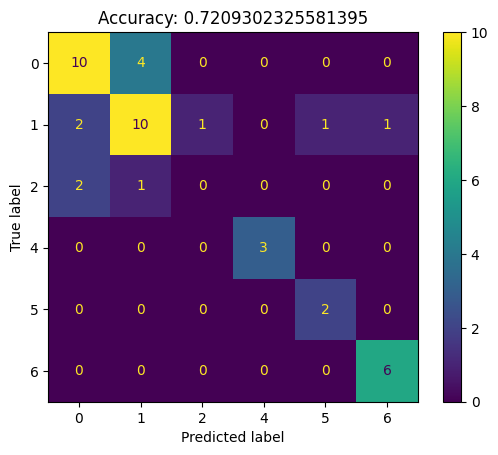

In [153]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

y_pred = log_reg.predict(X_test)

plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title(f'Accuracy: {accuracy_score(y_test, y_pred)}')
plt.show()

Using numpy:

Fitting model:

In [155]:
eta = 0.05
num_classes = 7
W_init = np.random.randn(X_train.T.shape[0], num_classes)
W = softmax_regression(X_train.T, y_train, num_classes, W_init, eta, max_iter=10000)
print(W[-1])

[[ 1.571794    3.88645991  0.6286699  -2.42804302 -0.25005412 -1.32866377
   0.19125174]
 [ 0.23936234  0.54876007 -2.34569954 -0.91975328  0.02657655 -1.35107602
   3.1009739 ]
 [-0.81201114 -0.80113916 -0.67362271 -0.23937475 -0.94160968  2.38871834
   3.05459587]
 [ 3.12769198  0.2117804   1.57481516  0.0978741  -0.92574399 -0.49450033
  -0.36768824]
 [-2.3732472  -0.13326586 -1.41559296  0.48816676  3.05764746  0.83387092
   2.66496682]
 [ 0.13495623 -0.85584286 -2.2747748  -0.95727918 -0.08592741  0.18461789
   2.69253245]
 [ 0.86362941  0.94204626 -1.17798305 -0.10878485  1.43917506 -2.75201594
   1.93619312]
 [-0.08912597 -0.61561613  0.5194592   0.21538767  0.37916683 -0.20568599
  -1.83939294]
 [-0.6465777   1.35008012 -0.89450025  1.23372725  0.69414991 -1.46950984
   1.56632023]
 [ 0.72315303  0.5870404   0.54201532 -0.92916402  0.34505895 -1.46044462
  -1.32330716]]


Evaluate:

<Figure size 1000x600 with 0 Axes>

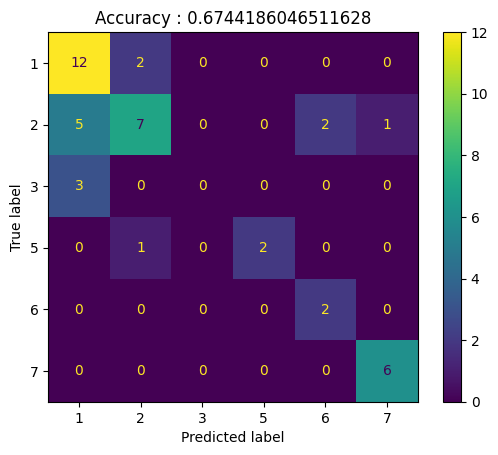

In [156]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

y_pred = pred(W[-1], X_test.T)

plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test + 1, y_pred + 1)
plt.title(f'Accuracy : {accuracy_score(y_test + 1, y_pred + 1)}')
plt.show()

#### Vi dụ 4 (bài tập tự thực hành):

In [193]:
import os 
import numpy as np 
      
# train path 
train_images_path = 'train-images-idx3-ubyte.gz'
train_labels_path = 'train-labels-idx1-ubyte.gz'
# test path 
test_images_path = 't10k-images-idx3-ubyte.gz'
test_labels_path = 't10k-labels-idx1-ubyte.gz'

Read images from zip file:

In [194]:
def get_mnist_data(images_path, labels_path, num_images 
                   , shuffle=False, _is=True, image_size=28): 
    """ 
        This shuffle param is active when .gz is downloaded at: 
            - 'http://yann.lecun.com/exdb/mnist/' 
            - This function return random num_images in 60000 or 10000   
    """ 
    # read data 
    import gzip           # to decompress gz (zip) file 
 
    # open file training to read training data 
    f_images = gzip.open(images_path,'r') 
     
    # skip 16 first bytes because these are not data, only header infor 
    f_images.read(16) 
     
    # general: read num_images data samples if this parameter is set; 
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000) 
 
    # read all data to buf_images (28x28xreal_num) 
    buf_images = f_images.read(image_size * image_size * real_num) 
     
    # images 
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32) 
    images = images.reshape(real_num, image_size, image_size,) 
     
    # Read labels    
    f_labels = gzip.open(labels_path,'r') 
    f_labels.read(8) 
     
    labels = np.zeros((real_num)).astype(np.int64) 
     
    # rearrange to correspond the images and labels 
    for i in range(0, real_num):    
        buf_labels = f_labels.read(1) 
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64) 
     
    # shuffle to get random images data 
    if shuffle is True: 
        rand_id = np.random.randint(real_num, size=num_images) 
         
        images = images[rand_id, :] 
        labels = labels[rand_id,] 
     
    # change images data to type of vector 28x28 dimentional 
    images = images.reshape(num_images, image_size * image_size) 
    return images, labels

In [195]:
train_images, train_labels = get_mnist_data( 
    train_images_path, train_labels_path, 5000, shuffle=True) 
 
test_images, test_labels = get_mnist_data( 
    test_images_path, test_labels_path, 10000, _is=False, shuffle=True) 
 
print(train_images.shape, train_labels.shape) 
print(test_images.shape, test_labels.shape)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27292\3848135005.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(5000, 784) (5000,)
(10000, 784) (10000,)


In [196]:
def get_image(image): 
    return image.reshape(28, 28)

def _softmax_regression(X, Y, theta, lambda_=0.5, 
                       iterations=20, learning_rate=1e-5, batch_size=200): 
    from sklearn.metrics import log_loss 
     
    losses = [] 
    _theta = theta 
    d, N = X.shape 
     
    for iter_ in range(iterations): 
        shuffle_index = np.random.permutation(N) 
        for i in shuffle_index: 
            xi = X[:, i].reshape(d, 1) 
            yi = Y[:, i].reshape(10, 1) 
            ai = softmax_stable(np.dot(_theta.T, xi)) 
            _theta += learning_rate * xi.dot((yi - ai).T) 
            if (iter_ * N + i) % batch_size == 0: 
                Y_hat = softmax_stable(np.dot(_theta.T, X))
                losses.append(log_loss(Y.T, Y_hat.T)) 
                 
        Y_hat = softmax_stable(np.dot(_theta.T, X))
        print(f"epoch {iter_} - cost {log_loss(Y.T, Y_hat.T) / N}") 
                 
    return _theta, losses

Data prepare:

4 0


<Figure size 640x480 with 0 Axes>

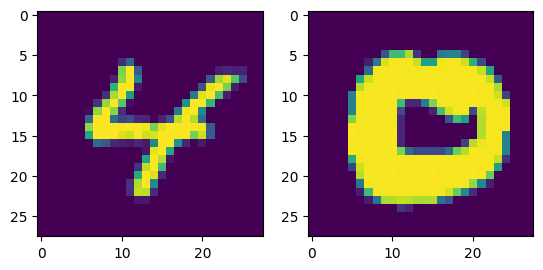

In [197]:
# for display and test digit :D  
import random 
import matplotlib.pyplot as plt 
 
index = random.randint(0, 1000) 
print(train_labels[index], test_labels[index]) 
 
 
train_image = np.asarray(get_image(train_images[index])).squeeze() 
test_image = np.asarray(get_image(test_images[index])).squeeze() 
 
plt.figure() 
 
#subplot(r,c) provide the no. of rows and columns 
f, axarr = plt.subplots(1, 2)  
 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically 
axarr[0].imshow(train_image) 
axarr[1].imshow(test_image) 
plt.show()

In [198]:
X_train = np.concatenate((np.ones((1, train_images.shape[0])), train_images.T),  
         axis = 0) 
Y_train = convert_labels(train_labels, 10)
print(X_train.shape) 
print(Y_train.shape) 

(785, 5000)
(10, 5000)


Fitting model:

In [191]:
theta = np.zeros((X_train.shape[0], 10)) 
 
opt_theta, losses = _softmax_regression(X_train, Y_train, theta) 
print('training success: ', opt_theta.shape, len(losses))

epoch 0 - cost 0.000553462013391894
epoch 1 - cost 0.0006312573473056434
epoch 2 - cost 0.0003714124657999908
epoch 3 - cost 0.0003594550952851708
epoch 4 - cost 0.0003512630901557454
epoch 5 - cost 0.00043932663558054943
epoch 6 - cost 0.0002883071319914896
epoch 7 - cost 0.00029688810360789877
epoch 8 - cost 0.0005963216002318482
epoch 9 - cost 0.0003569722138884518
epoch 10 - cost 0.00037201609766767676
epoch 11 - cost 0.000337257207306785
epoch 12 - cost 0.00020351967784934533
epoch 13 - cost 0.00035408936333235046
epoch 14 - cost 0.0002922376995592708
epoch 15 - cost 0.00032105801470184216
epoch 16 - cost 0.00015455538845905313
epoch 17 - cost 0.00024511829212285673
epoch 18 - cost 0.00023698144629793262
epoch 19 - cost 0.00025658209848611834
training success:  (785, 10) 500


Evaluate:

In [192]:
from sklearn.metrics import accuracy_score 
print('accuracy training data: ', accuracy_score(train_labels,  pred(opt_theta, X_train))) 
 
# test_images, test_labels = get_mnist_data( 
#     test_images_path, test_labels_path, 1000, _is=False, shuffle=False) 
 
X_test = np.concatenate((np.ones((1, test_images.shape[0])), test_images.T),  
         axis = 0) 
print(X_test.shape) 
print('accuracy testing data: ', accuracy_score(test_labels, pred(opt_theta, X_test)))

accuracy training data:  0.9322
(785, 10000)
accuracy testing data:  0.8506


a.

In [214]:
def display(X, label):
    markers = ['o', 's', '^', 'v', 'D', 'p', '*', 'x', '+', 'h']
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

    plt.figure(figsize=(10, 6))
    for i in range(10):
        X_temp = X[label == i, :]
        plt.scatter(X_temp[:, 0], X_temp[:, 1], 
                   marker=markers[i], 
                   color=colors[i], 
                   s=30,
                   alpha=0.8, 
                   label=f'{i}')
    
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

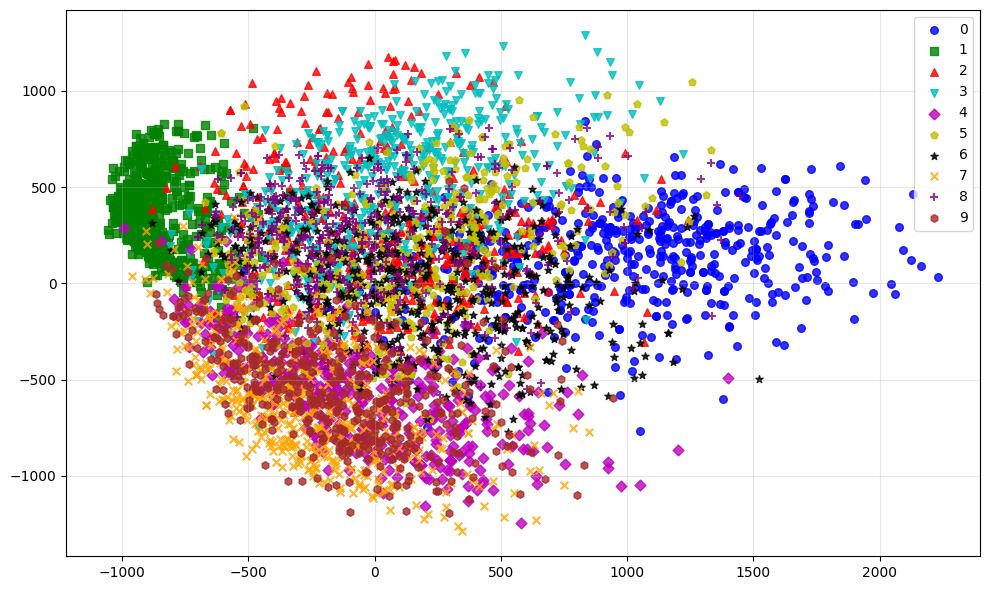

In [215]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #2-dimensional PCA
transformed = pca.fit_transform(train_images)

display(transformed, train_labels)

b. Using scikit-learn

In [216]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
log_reg.fit(train_images, train_labels)

LogisticRegression(max_iter=10000)

<Figure size 1000x600 with 0 Axes>

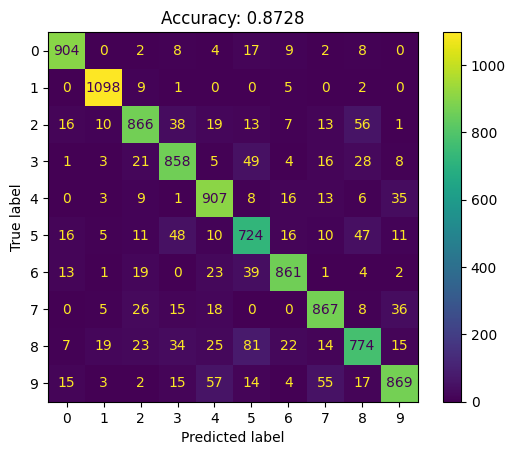

In [217]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# evaluate
y_pred = log_reg.predict(test_images)

plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)
plt.title(f'Accuracy: {accuracy_score(test_labels, y_pred)}')
plt.show()


- Cách cài đặt sử dụng numpy cho hiệu suất tương tương so với việc sử dụng thư viện